In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Vibration in a one-dimensional system

질량이 $m$인 $N$개의 동일한 물체가 일렬로 동일한 용수철에 매달려 있다. $i$번째 물체의 운동방정식은 다음처럼 주어진다.  
$$m \frac{d^2 x_i}{dt^2} = k(x_{i+1}-x_{i}) - k(x_i-x_{i-1})$$  
한쪽 끝에서 연결된 용수철에 주기적인 힘($F$)을 가하고 있다. 그러면 양 끝단에 물체에 운동방정식은 다음과 같다.  
$$m \frac{d^2 x_1}{dt^2} = k(x_{2}-x_{1}) + F \\
m \frac{d^2 x_N}{dt^2} = -k(x_{N}-x_{N-1})$$  
만약 주기적인 힘이 $F=C e^{i wt}$로 주어지면 $x_i(t)=a_iexp[iwt]$ 해를 가진다.  정리하면 다음과 같은 방정식을 얻을 수 있다.  
$$(d -k)a_1 -k a_2 = C, \\
d a_i - k a_{i-1}- k a_{i+1} = 0, \\
(d - k)a_N - k x_{N-1} =0$$  
여기에서 $d=2k-mw^2$이다.

위의 운동방정식을 행렬로 표현하면 다음과 같다.  
$$Ma=b $$
$$
M=
\begin{pmatrix}
d-k & -k & 0 & 0 & 0 & \cdots \\
-k & d & -k & 0 & 0 & \cdots \\
0 & -k & d & -k & 0 & \cdots \\
\cdots &\cdots &\cdots &\cdots &\cdots & \cdots  \\
0 & 0 & 0& 0& -k & d-k 
\end{pmatrix}, \quad
a=
\begin{pmatrix}
a_1 \\ 
a_2 \\ 
a_3 \\ 
\cdots \\ 
a_N  
\end{pmatrix}, \quad
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
0 
\end{pmatrix}
$$  


* $m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.   
* $w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요. 
* 이를 그래프로 표현하고 의미를 설명하세요.

* 40X40 행렬을 직접 입력하는 것을 금지하지는 않지만 그렇게 하지 않기를 바랍니다.
* np.zeros(n) 함수는 크기가 n이며 모든 성분이 0인 배열을 만드는 명령어입니다. 

In [20]:
m=1
k=1
c=1
N=40

def get_amplitude(ang_freq):
    m=1
    k=1
    c=1
    N=40
    w=ang_freq
    d=2*k-m*w**2
    m=np.zeros((40,40))
    b=np.zeros((40,1))
    b[0,0]=c
    for i in range(39):
        m[i+1,i]=-k
        m[i,i+1]=-k
        m[i,i]=d
        m[39,39]=d-k
        m[0,0]=d-k
    a=np.dot(np.linalg.inv(m),b)
    return a

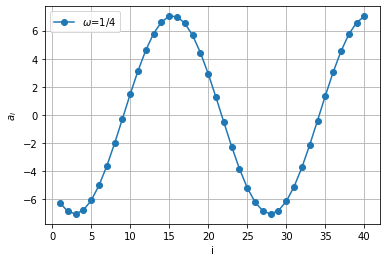

In [7]:

x=np.arange(1,41,1)
plt.plot(x,get_amplitude(1/4),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=1/4'])
plt.grid(True)
plt.show()

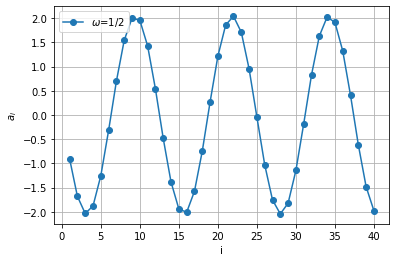

In [8]:
plt.plot(x,get_amplitude(1/2),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=1/2'])
plt.grid(True)
plt.show()

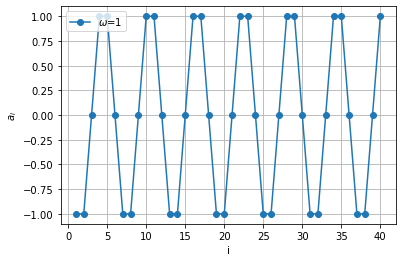

In [9]:
plt.plot(x,get_amplitude(1),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=1'])
plt.grid(True)
plt.show()

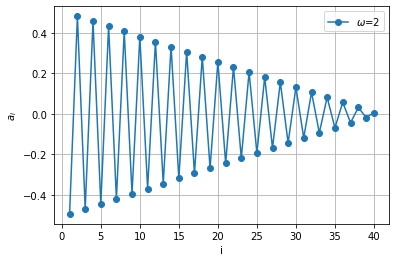

In [10]:
plt.plot(x,get_amplitude(2),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=2'])
plt.grid(True)
plt.show()

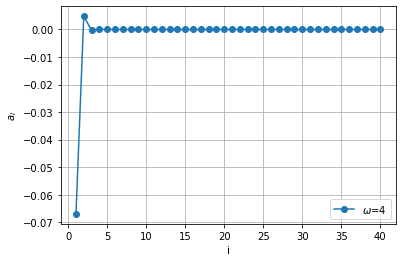

In [11]:
plt.plot(x,get_amplitude(4),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=4'])
plt.grid(True)
plt.show()

$x_i(t)=a_ie^{i\omega t}$ 이므로 각 물체들은 $x_i-a_i$에서 $x_i+a_i$ 사이를 $\omega$의 각진동수로 진동하고있다.

$\omega$=1 일때 처럼 두개씩 짝을 진동하는 경우도 있고 $\omega$=4 처럼 진동하지 않는 경우도 있다. (F가 가해지는 물체 제외)

# 2. 양쪽 끝에서 힘을 가하면 어떻게 되는가?

즉, b행렬이 다음과 같은 경우에 대해서 살펴보아라.
$$
b=
\begin{pmatrix}
C \\ 
0 \\ 
0 \\ 
\cdots \\ 
C 
\end{pmatrix}
$$ 

* $m=1$, $k=1$, $C=1$, $N=40$으로 고정하세요.   
* $w$ (즉, d)를 바꾸어가면서 $a_i$를 구하세요. 
* 이를 그래프로 표현하고 의미를 설명하세요. (x축이 i (1-N), y축이 $a_i$)

In [26]:
def get_amplitude2(ang_freq):
    m=1
    k=1
    c=1
    N=40
    w=ang_freq
    d=2*k-m*w**2
    m=np.zeros((40,40))
    b=np.zeros((40,1))
    b[0,0]=1
    b[39,0]=1
    
    for i in range(39):
        m[i+1,i]=-k
        m[i,i+1]=-k
        m[i,i]=d
        m[39,39]=d-k
        m[0,0]=d-k
    a=np.dot(np.linalg.inv(m),b)
    return a

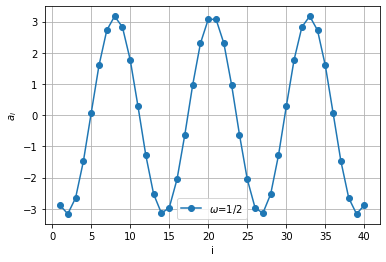

In [36]:
x=np.arange(1,41,1)
plt.plot(x,get_amplitude2(1/2),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=1/2'])
plt.grid(True)
plt.show()

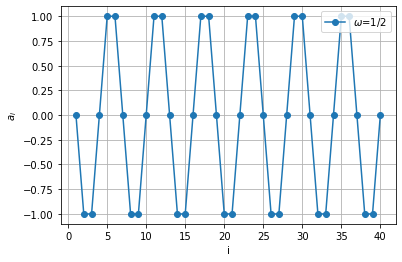

In [31]:
x=np.arange(1,41,1)
plt.plot(x,get_amplitude2(1),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=1'])
plt.grid(True)
plt.show()

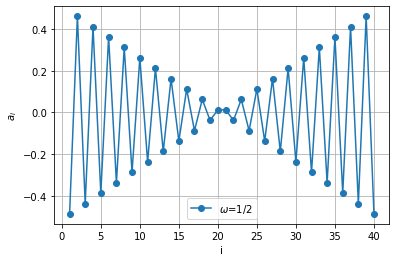

In [35]:
x=np.arange(1,41,1)
plt.plot(x,get_amplitude2(2),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=2'])
plt.grid(True)
plt.show()

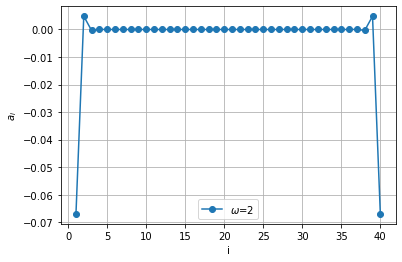

In [38]:
x=np.arange(1,41,1)
plt.plot(x,get_amplitude2(4),'o-')
plt.xlabel('i')
plt.ylabel('$a_i$')
plt.legend(['$\omega$=2'])
plt.grid(True)
plt.show()